In [1]:
import sys
import xarray as xr
import matplotlib.pyplot as plt

sys.path.append('../')

In [2]:
from SwotDiag.diagnosis import *

### Standard SWOT product (2 km, L3)

In [3]:
file = '../Samples/SWOT_L3_LR_SSH_Expert_006_532_20231121T123734_20231121T132901_v0.3_SMST_FOCUS.nc'
SWOT = xr.open_dataset(file)

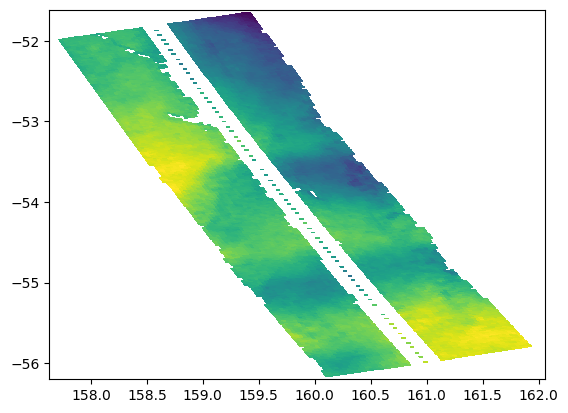

In [4]:
plt.pcolormesh(SWOT.longitude, SWOT.latitude, SWOT.ssha)

### Standard SSH (not noiseless)

In [17]:
diag_dxdy = compute_ocean_diagnostics_from_eta(SWOT.ssha + SWOT.mdt, SWOT.longitude, SWOT.latitude, derivative = 'dxdy', n = 5)
diag_fit_5 = compute_ocean_diagnostics_from_eta(SWOT.ssha + SWOT.mdt, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 5)
diag_fit_9 = compute_ocean_diagnostics_from_eta(SWOT.ssha + SWOT.mdt, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 9)

Fitting derivatives on 16974 points (5*5 points kernel):   0%|          | 0/246 [00:00<?, ?it/s]

Fitting derivatives on 16974 points (5*5 points kernel): 100%|██████████| 246/246 [00:01<00:00, 204.59it/s]
Fitting derivatives on 16974 points (9*9 points kernel): 100%|██████████| 246/246 [00:01<00:00, 215.49it/s]


In [18]:
zeta_dxdy = diag_dxdy['zeta']
zeta_fit_5 = diag_fit_5['zeta']
zeta_fit_9 = diag_fit_9['zeta']

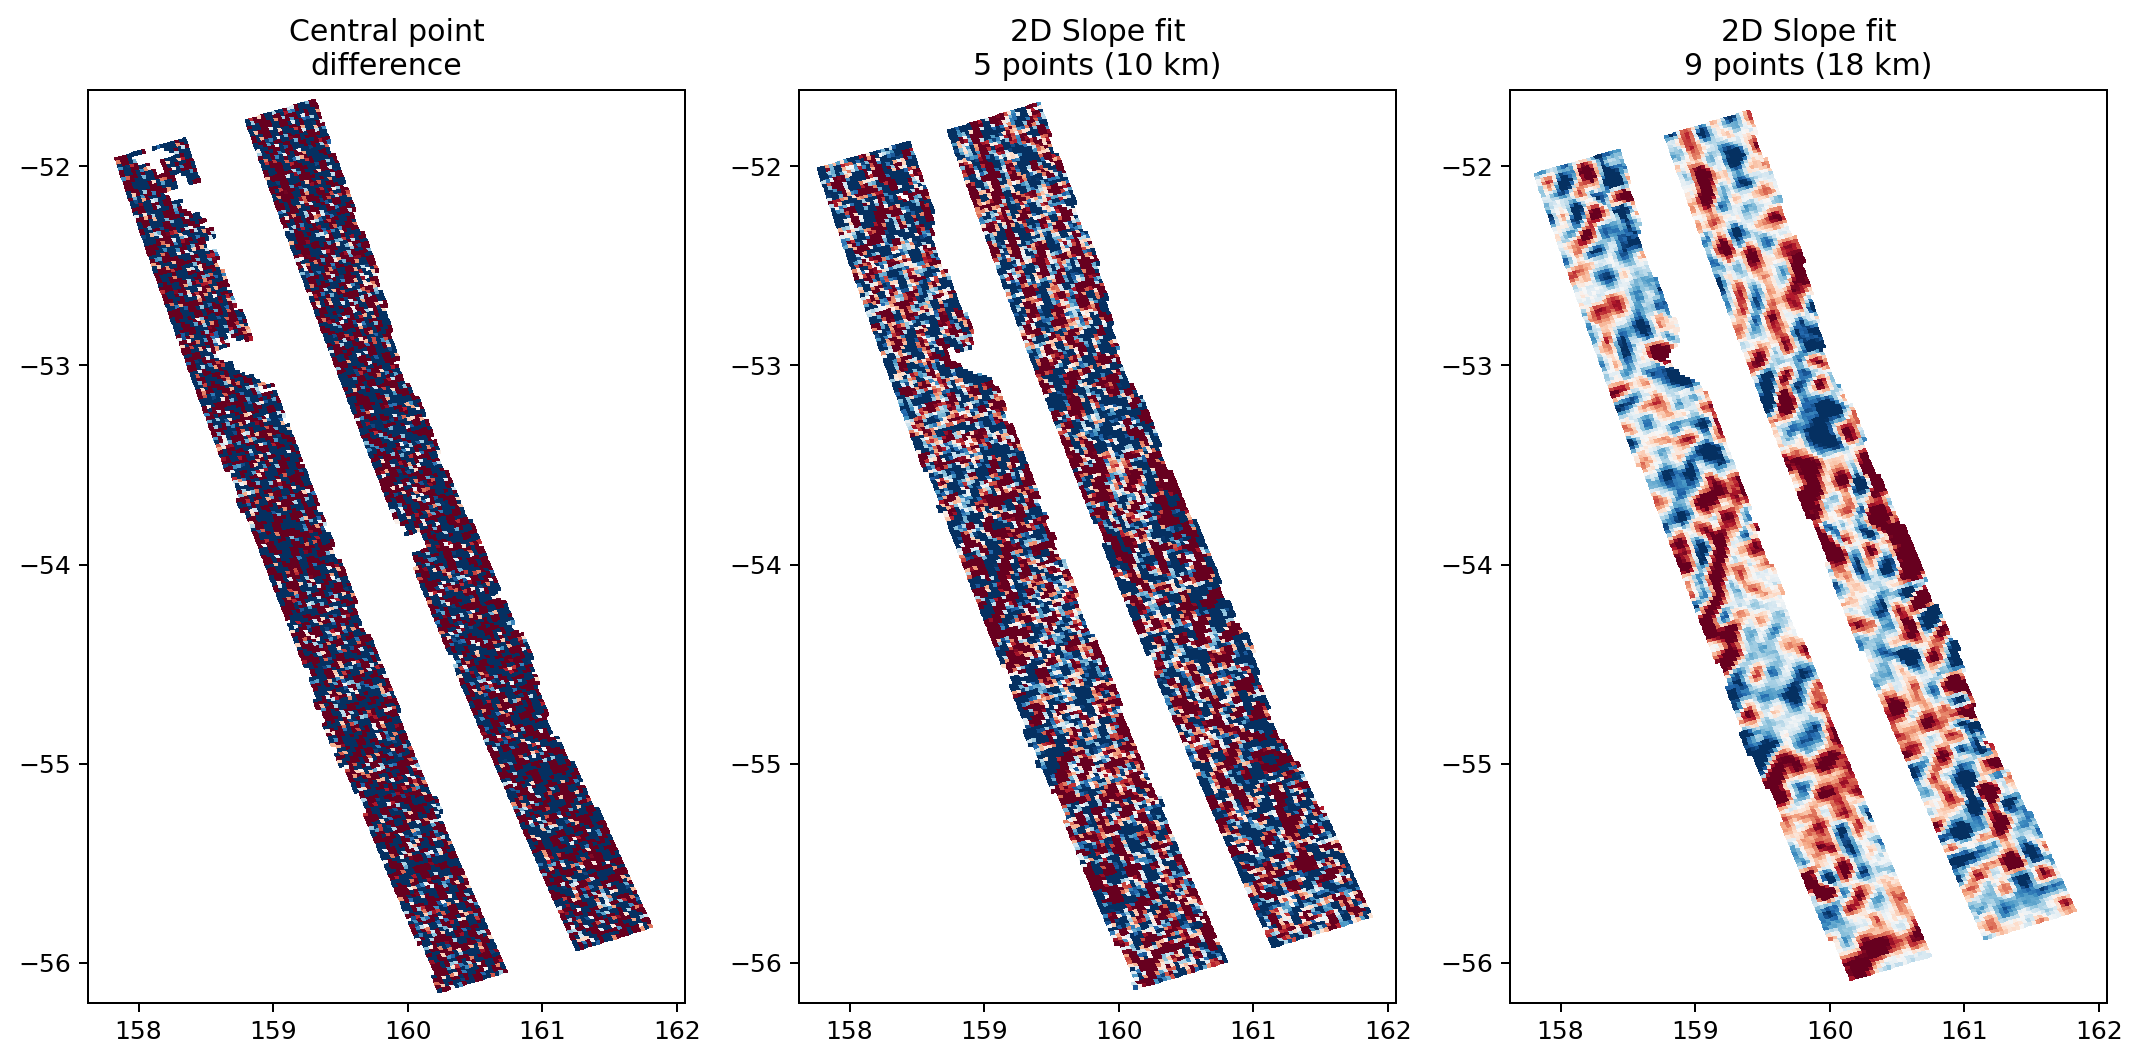

In [19]:
clim = (-0.5, 0.5)

plt.figure(figsize = (12, 6), dpi = 180)

plt.subplot(131)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_dxdy, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('Central point\ndifference')

plt.subplot(132)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_fit_5, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('2D Slope fit\n5 points (10 km)')

plt.subplot(133)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_fit_9, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('2D Slope fit\n9 points (18 km)')

plt.tight_layout()

#### Noiseless SSH

In [20]:
diag_dxdy = compute_ocean_diagnostics_from_eta(SWOT.ssha_noiseless + SWOT.mdt, SWOT.longitude, SWOT.latitude, derivative = 'dxdy', n = 5)
diag_fit_5 = compute_ocean_diagnostics_from_eta(SWOT.ssha_noiseless + SWOT.mdt, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 5)
diag_fit_9 = compute_ocean_diagnostics_from_eta(SWOT.ssha_noiseless + SWOT.mdt, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 9)

Fitting derivatives on 16974 points (5*5 points kernel):   0%|          | 0/246 [00:00<?, ?it/s]

Fitting derivatives on 16974 points (5*5 points kernel): 100%|██████████| 246/246 [00:01<00:00, 208.56it/s]
Fitting derivatives on 16974 points (9*9 points kernel): 100%|██████████| 246/246 [00:01<00:00, 235.18it/s]


In [21]:
zeta_dxdy = diag_dxdy['zeta']
zeta_fit_5 = diag_fit_5['zeta']
zeta_fit_9 = diag_fit_9['zeta']

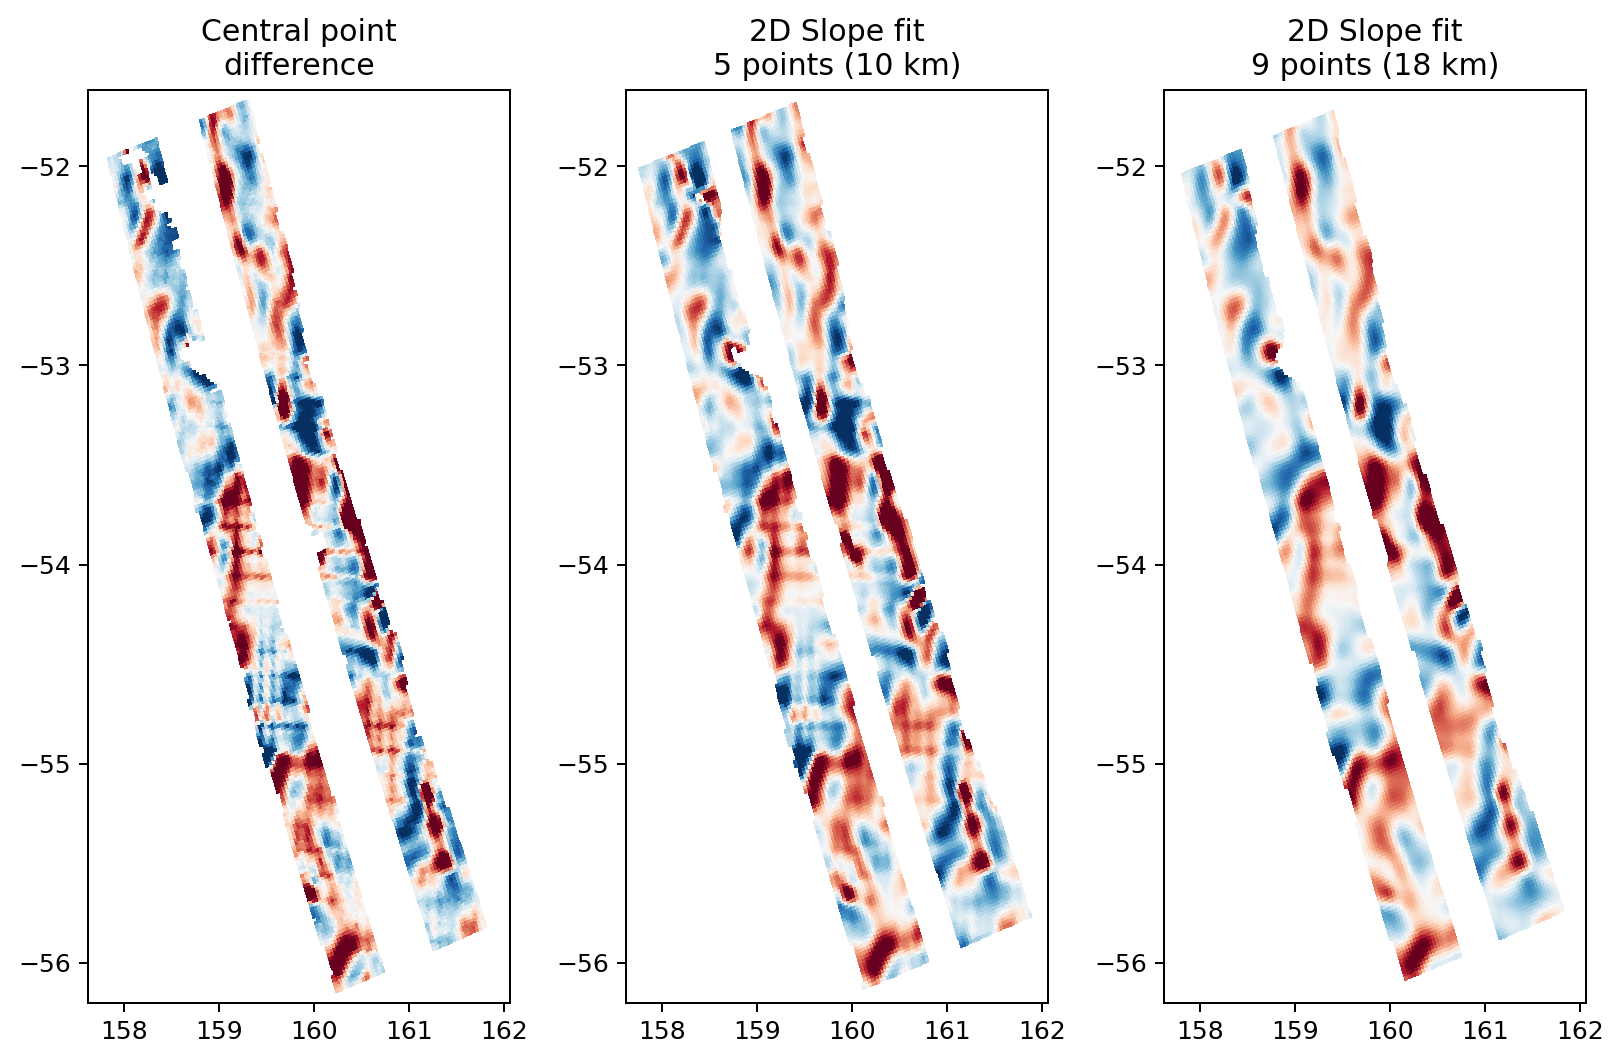

In [22]:
clim = (-0.5, 0.5)

plt.figure(figsize = (12, 6), dpi = 180)

plt.subplot(141)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_dxdy, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('Central point\ndifference')

plt.subplot(142)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_fit_5, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('2D Slope fit\n5 points (10 km)')

plt.subplot(143)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_fit_9, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('2D Slope fit\n9 points (18 km)')


# plt.subplot(144)
# plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_fit_13, cmap = 'RdBu_r')
# plt.clim(clim)
# plt.title('2D Slope fit\n13 points (26 km)')

plt.tight_layout()